
# <center><font color="red">Project 3</font></center>
<center>

SHIVAKRISHNA MACHA

##  <font color="red">1: Introduction</font>


I'll be examining the major reasons of Motor Vehicle Crashes in New York City for this research ("NYC"). The dataset is from [DATA.GOV](https://catalog.data.gov/dataset/motor-vehicle-collisions-crashes) it contains the date, time, location and the casualities happened due to the crash.Initially I thought of taking the data from last 5 years which lead to storage issue and then I decided to keep the scope of data from the year of 2022 and 2023 with 180030 observations and 29 attributes.

The major goal of this investigation is to answer the below research questions:

1. **Temporal Analysis** :
 > What are the temporal trends in motor vehicle crashes over time? Are there specific times of the day, days of the week, or months with higher accident rates?

 >Is there a correlation between the time of day and the severity of crashes (i.e., more fatalities during certain hours)?

2. **Spatial Analysis** : Where are the most dangerous locations for motor vehicle crashes? Can we identify high-risk areas?

3. **Seasonal Trends** :
 > Are there seasonal variations in the frequency and severity of motor vehicle crashes?

4. **Model related Research**:
> Based on the vehicle crash analysis, what are the major number of the crashes, where the humans are killed?.
> What is the best correlation between the other variables and killed persons count?


## <font color="red">2: Data Summary
</font>

As previously indicated, the dataset was obtained via DATA.GOV.
As part of usecases the dataset includes statistics on motor vehicle crashes in New York . There are 180030 observation with 29 attributes each over the span of two years i.e., 2022 and 2023
Each record contains the following attributes:

1. Crash Date
    * The date on which the crash happened
2. Crash Time
    * Time of Crash
3. Borough
    * Borough of the Crash
4. Zip Code
    * Zip code of the crash location
5. Lattitude
    * Latitide of the crash location
6. Longitude
    * Longitude of the crash location
7. Location :
    * Lattitude and Longitude of the crash place
8. On Street name
    * Name of the street where crash happened
9. Cross Street
    * Connecting street to the crash happened street
10. Off Street
    * Not a private street
11. No of Persons Injured
    * Number of persons Injured in the crash
12. No of Persons Killed
    * Number of persons killed in the crash
13. No of Pedestrians Injured
    * No of Pedestrians injured in the crash
14. No of Pedestrians Killed
    * No of Pedestrians Killed in the crash
15. No of Cyclist Injured  
    * No of Cyclist Injured in the crash
16. No of Cyclist Killed
    * No of Cyclist Killed in the crash
17. No of Motorist Injured
    * No of Motorist Injured in the crash
18. No of Motorist Killed
    * No of Motorist killed in the crash
19. Contributing Vehicle Factor 1
    * The factor that contribute to the crash of vehicle 1
20. Contributing Vehicle Factor 2
    * The factor that contribute to the crash of vehicle 2
21. Contributing Vehicle Factor 3
    * The factor that contribute to the crash of vehicle 3
22. Contributing Vehicle Factor 4
    * The factor that contribute to the crash of vehicle 4
23. Contributing Vehicle Factor 5
    * The factor that contribute to the crash of vehicle 5
24. Collision ID
    * Coliision Id which is a unique identification number
25. Vehicle Type Code 1
    * Type of the vehicle1 involved in the crash
26. Vehicle Type Code 2
    * Type of the vehicle2 involved in the crash
27. Vehicle Type Code 3
    * Type of the vehicle3 involved in the crash
28. Vehicle Type Code 4
    * Type of the vehicle4 involved in the crash
29. Vehicle Type Code 5
    * Type of the vehicle5 involved in the crash



In [197]:
#Import packages/libraries
print("Importing packages/libraries")
# Installing sodapy package
!pip install sodapy
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sodapy import Socrata #which allowing us to create a client for interacting with the Socrata API.

print("Imported packages/libraries End")

print("Fetching Data from API End Point Starts")
# Fetching the data using the API endpoint
client = Socrata("data.cityofnewyork.us", None)
results = client.get("h9gi-nx95", limit=180030)
# The 'get' method of the Socrata client is used to fetch data from the dataset with the identifier "h9gi-nx95."
#if we dont specify the limit API returns only 1000 observations,so I came to know that there are 180030 observation from the data description given in the webiste so mentioned the limit
# Convert to pandas DataFrame as API returns data in JSON format
data = pd.DataFrame.from_records(results)
data.head()
print(data)
print("Fetching Data from API End Point Ends here")

Importing packages/libraries


Imported packages/libraries End
Fetching Data from API End Point Starts
                     crash_date crash_time                    on_street_name  \
0       2021-09-11T00:00:00.000       2:39             WHITESTONE EXPRESSWAY   
1       2022-03-26T00:00:00.000      11:45           QUEENSBORO BRIDGE UPPER   
2       2022-06-29T00:00:00.000       6:55                THROGS NECK BRIDGE   
3       2021-09-11T00:00:00.000       9:35                               NaN   
4       2021-12-14T00:00:00.000       8:13                   SARATOGA AVENUE   
...                         ...        ...                               ...   
180025  2020-12-26T00:00:00.000      14:00                               NaN   
180026  2021-01-09T00:00:00.000      16:52  BROADWAY                           
180027  2021-01-15T00:00:00.000      12:20  MARCY AVENUE                       
180028  2020-12-28T00:00:00.000      11:37  30 ROAD                            
180029  2021-02-06T00:00:00.000      18:00      

In [198]:
#Display the imported data types of all attributes
print("Display the imported data types of all attributes")
data.info()

Display the imported data types of all attributes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180030 entries, 0 to 180029
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   crash_date                     180030 non-null  object
 1   crash_time                     180030 non-null  object
 2   on_street_name                 131006 non-null  object
 3   off_street_name                83270 non-null   object
 4   number_of_persons_injured      180030 non-null  object
 5   number_of_persons_killed       180030 non-null  object
 6   number_of_pedestrians_injured  180030 non-null  object
 7   number_of_pedestrians_killed   180030 non-null  object
 8   number_of_cyclist_injured      180030 non-null  object
 9   number_of_cyclist_killed       180030 non-null  object
 10  number_of_motorist_injured     180030 non-null  object
 11  number_of_motorist_killed      180030 non-null  object

Pandas has considered the datatypes of attributes as displayed above by default, we would be converting them as per requirement(int/float) in further analysis.

## <font color="red">3: Exploratory Data Analysis (EDA)</font>

In order to go on with this portion of the study, we will first run a summary statistic for each of the characteristics, look for any outliers or NULL values that could have an impact on our findings, and then provide graphical analyses for each attribute using both Matplotlib and Seaborn.

To begin, we'll import the required packages/libraries and then read the data into the program as shown

In [199]:
#Import packages/libraries
print("Importing packages/libraries")
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sodapy import Socrata
print("Imported packages/libraries End")

print("Fetching Data from API End Point Starts")
# Fetching the data using the API endpoint
client = Socrata("data.cityofnewyork.us", None)
results = client.get("h9gi-nx95", limit=180030)
#if we dont specify the limit API returns only 1000 observations,so I came to know that there are 180030 observation from the data description given in the webiste so mentioned the limit
# Convert to pandas DataFrame as API returns data in JSON format
data = pd.DataFrame.from_records(results)
data.head()
print(data)
print("Fetching Data from API End Point Ends here")

Importing packages/libraries
Imported packages/libraries End
Fetching Data from API End Point Starts
                     crash_date crash_time                    on_street_name  \
0       2021-09-11T00:00:00.000       2:39             WHITESTONE EXPRESSWAY   
1       2022-03-26T00:00:00.000      11:45           QUEENSBORO BRIDGE UPPER   
2       2022-06-29T00:00:00.000       6:55                THROGS NECK BRIDGE   
3       2021-09-11T00:00:00.000       9:35                               NaN   
4       2021-12-14T00:00:00.000       8:13                   SARATOGA AVENUE   
...                         ...        ...                               ...   
180025  2021-01-10T00:00:00.000      11:35  WEST 37 STREET                     
180026  2020-12-21T00:00:00.000       5:35                               NaN   
180027  2020-12-16T00:00:00.000      18:45  JACKIE ROBINSON PKWY               
180028  2021-01-18T00:00:00.000       6:40                               NaN   
180029  2021-01-27T

In [200]:
#lets drop the attributes that we are not considering to answer the above mentioned research
data.drop(['zip_code','latitude','longitude','location','cross_street_name','off_street_name','contributing_factor_vehicle_2','contributing_factor_vehicle_3','contributing_factor_vehicle_4','contributing_factor_vehicle_5','vehicle_type_code2','vehicle_type_code_3','vehicle_type_code_4','vehicle_type_code_5'],axis=1,inplace=True)

In [201]:
data['number_of_cyclist_killed'].value_counts()

0    179997
1        33
Name: number_of_cyclist_killed, dtype: int64

In [202]:
#data after dropping the unwanted attributes
data

,crash_date,crash_time,on_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,collision_id,vehicle_type_code1,borough
0,2021-09-11T00:00:00.000,2:39,WHITESTONE EXPRESSWAY,2,0,0,0,0,0,2,0,Aggressive Driving/Road Rage,4455765,Sedan,NaN
1,2022-03-26T00:00:00.000,11:45,QUEENSBORO BRIDGE UPPER,1,0,0,0,0,0,1,0,Pavement Slippery,4513547,Sedan,NaN
2,2022-06-29T00:00:00.000,6:55,THROGS NECK BRIDGE,0,0,0,0,0,0,0,0,Following Too Closely,4541903,Sedan,NaN
3,2021-09-11T00:00:00.000,9:35,NaN,0,0,0,0,0,0,0,0,Unspecified,4456314,Sedan,BROOKLYN
4,2021-12-14T00:00:00.000,8:13,SARATOGA AVENUE,0,0,0,0,0,0,0,0,NaN,4486609,NaN,BROOKLYN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180025,2021-01-10T00:00:00.000,11:35,WEST 37 STREET,0,0,0,0,0,0,0,0,Failure to Yield Right-of-Way,4382913,Station Wagon/Sport Utility Vehicle,MANHATTAN
180026,2020-12-21T00:00:00.000,5:35,NaN,0,0,0,0,0,0,0,0,Unspecified,4377735,Sedan,BROOKLYN
180027,2020-12-16T00:00:00.000,18:45,JACKIE ROBINSON PKWY,0,0,0,0,0,0,0,0,Reaction to Uninvolved Vehicle,4376849,Sedan,NaN
180028,2021-01-18T00:00:00.000,6:40,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,4384808,Station Wagon/Sport Utility Vehicle,QUEENS


In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180030 entries, 0 to 180029
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   crash_date                     180030 non-null  object
 1   crash_time                     180030 non-null  object
 2   on_street_name                 131004 non-null  object
 3   number_of_persons_injured      180030 non-null  object
 4   number_of_persons_killed       180030 non-null  object
 5   number_of_pedestrians_injured  180030 non-null  object
 6   number_of_pedestrians_killed   180030 non-null  object
 7   number_of_cyclist_injured      180030 non-null  object
 8   number_of_cyclist_killed       180030 non-null  object
 9   number_of_motorist_injured     180030 non-null  object
 10  number_of_motorist_killed      180030 non-null  object
 11  contributing_factor_vehicle_1  179112 non-null  object
 12  collision_id                   180030 non-nu

Since we've successfully imported the data, we'll proceed to look through the data if there are null values. Null values may impact our research so we'll have to be keen

In [204]:
#Looking for the number of null values
data.isnull().sum()

crash_date                           0
crash_time                           0
on_street_name                   49026
number_of_persons_injured            0
number_of_persons_killed             0
number_of_pedestrians_injured        0
number_of_pedestrians_killed         0
number_of_cyclist_injured            0
number_of_cyclist_killed             0
number_of_motorist_injured           0
number_of_motorist_killed            0
contributing_factor_vehicle_1      918
collision_id                         0
vehicle_type_code1                2176
borough                          61856
dtype: int64

In [205]:
#sumamry statistics of the data
data.describe()

,crash_date,crash_time,on_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,collision_id,vehicle_type_code1,borough
count,180030,180030,131004,180030,180030,180030,180030,180030,180030,180030,180030,179112,180030,177854,118174
unique,804,1440,7729,20,4,7,3,4,2,19,4,55,180030,496,5
top,2021-05-27T00:00:00.000,0:00,BELT PARKWAY,0,0,0,0,0,0,0,0,Unspecified,4455765,Sedan,BROOKLYN
freq,433,2965,2354,115707,179573,167542,179832,171836,179997,139477,179829,44422,1,85198,40776


From the above statistics we can observe the median mode and mean values for all numerical columns and understand the distribution of the data

Now lets analyse the each attribute

In [206]:
data['crash_date'].describe()

count                      180030
unique                        804
top       2021-05-27T00:00:00.000
freq                          433
Name: crash_date, dtype: object

from the above data it is found that there are 814 unique values in the crash date attribute.

In [207]:
data['crash_time'].describe()

count     180030
unique      1440
top         0:00
freq        2965
Name: crash_time, dtype: object

from the above data it is found that there are 1440 unique values in the crash time attribute.

count       118174
unique           5
top       BROOKLYN
freq         40776
Name: borough, dtype: object


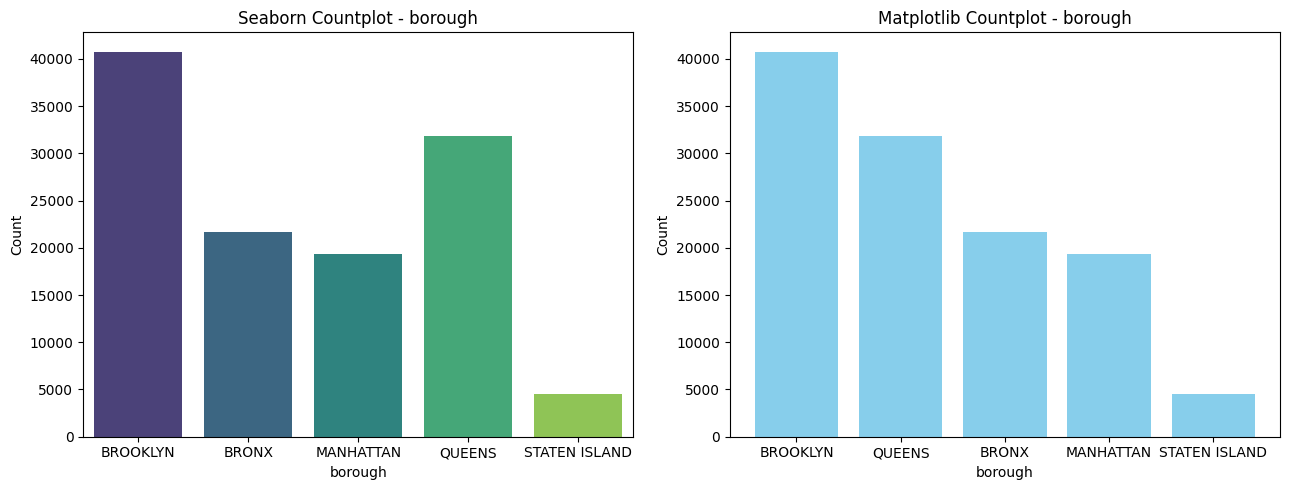

In [208]:
print(data['borough'].describe())
# Using Seaborn
plt.figure(figsize=(13, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=data['borough'], palette='viridis')
plt.title('Seaborn Countplot - borough')
plt.xlabel('borough')
plt.ylabel('Count')

# Using Matplotlib
plt.subplot(1, 2, 2)
value_counts = data['borough'].value_counts()
plt.bar(value_counts.index, value_counts, color='skyblue')
plt.title('Matplotlib Countplot - borough')
plt.xlabel('borough')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

From the above data it is found that there are 5 unique values in the Borough  attribute.Which says that there are 5 different borough are present.

In [209]:
data['on_street_name'].describe()

count           131004
unique            7729
top       BELT PARKWAY
freq              2354
Name: on_street_name, dtype: object

from the above data it is found that there are 7727 unique streets involved in crash in New York City.

count    180030.000000
mean          0.478654
std           0.802367
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          40.000000
Name: number_of_persons_injured, dtype: float64


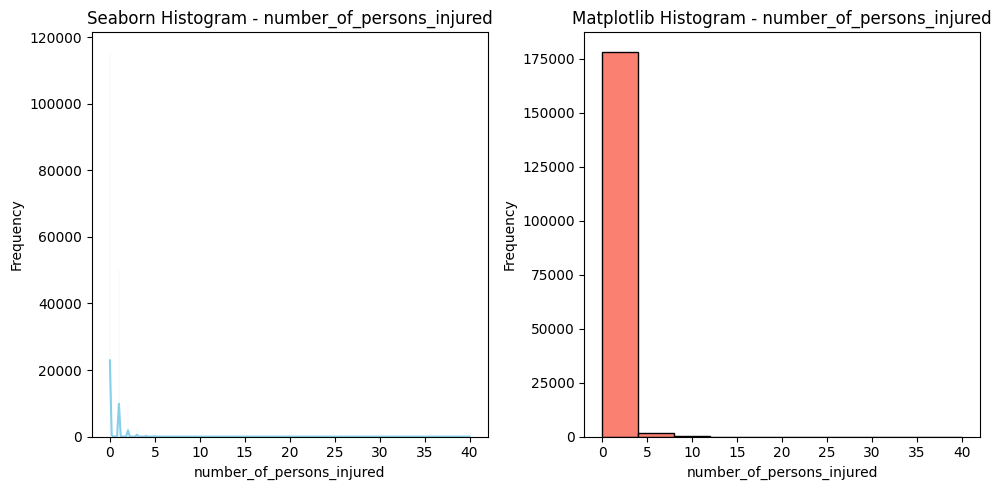

In [210]:
data['number_of_persons_injured']=data['number_of_persons_injured'].astype(int)
print(data['number_of_persons_injured'].describe())
# Using Seaborn
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['number_of_persons_injured'], kde=True, color='skyblue')
plt.title('Seaborn Histogram - number_of_persons_injured')
plt.xlabel('number_of_persons_injured')
plt.ylabel('Frequency')

# Using Matplotlib
plt.subplot(1, 2, 2)
plt.hist(data['number_of_persons_injured'], bins=10, color='salmon', edgecolor='black')
plt.title('Matplotlib Histogram - number_of_persons_injured')
plt.xlabel('number_of_persons_injured')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

We have total 180030 observations and from the above statistical data we can observe that the average no of persons injured in the crashes is 1 person per two crashes.From the above distribution, we can say that mostly number of persons injured were falling in the bin of 0 - 5.

count    180030.000000
mean          0.002644
std           0.053679
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: number_of_persons_killed, dtype: float64


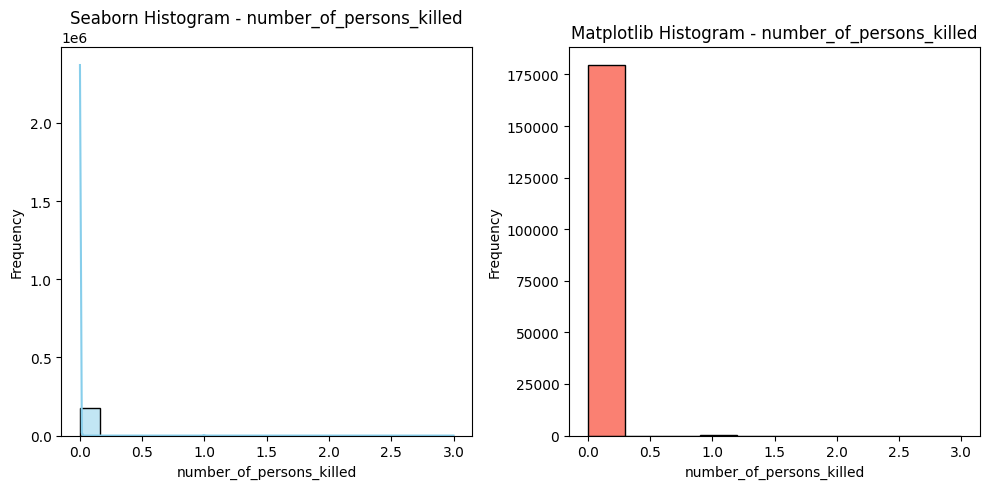

In [211]:
data['number_of_persons_killed']=data['number_of_persons_killed'].astype(int)
#here we can find the average and std deviation min and max no of people can be killed per a crash as below
print(data['number_of_persons_killed'].describe())

# Using Seaborn
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['number_of_persons_killed'], kde=True, color='skyblue')
plt.title('Seaborn Histogram - number_of_persons_killed')
plt.xlabel('number_of_persons_killed')
plt.ylabel('Frequency')

# Using Matplotlib
plt.subplot(1, 2, 2)
plt.hist(data['number_of_persons_killed'], bins=10, color='salmon', edgecolor='black')
plt.title('Matplotlib Histogram - number_of_persons_killed')
plt.xlabel('number_of_persons_killed')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

From the above distribution we can say that the maximum number of people killed per crash is 3 people.

In [212]:
#now lets convert the Crash date into a date data type
data['crash_date'] = pd.to_datetime(data['crash_date'])
print(data.dtypes)

crash_date                       datetime64[ns]
crash_time                               object
on_street_name                           object
number_of_persons_injured                 int64
number_of_persons_killed                  int64
number_of_pedestrians_injured            object
number_of_pedestrians_killed             object
number_of_cyclist_injured                object
number_of_cyclist_killed                 object
number_of_motorist_injured               object
number_of_motorist_killed                object
contributing_factor_vehicle_1            object
collision_id                             object
vehicle_type_code1                       object
borough                                  object
dtype: object


In the below step we extract the day month and year from the crash date attribute and also changed to its respective month day names to make easier to analyse the data well.

In [213]:
import calendar
#Exctracting the year, month, day to analyse the seasonal and temporal time analysis of crashes
data['Day'] = data['crash_date'].dt.day
data['Month'] = data['crash_date'].dt.month
data['Year'] = data['crash_date'].dt.year

# Map month and day numbers to their names without using map
data['Month'] = [calendar.month_name[x] for x in data['Month']]
data['Day'] = [calendar.day_name[x % 7] for x in data['Day']]  # % 7 to handle Sunday as the first day


data.head()

,crash_date,crash_time,on_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,collision_id,vehicle_type_code1,borough,Day,Month,Year
0,2021-09-11,2:39,WHITESTONE EXPRESSWAY,2,0,0,0,0,0,2,0,Aggressive Driving/Road Rage,4455765,Sedan,NaN,Friday,September,2021
1,2022-03-26,11:45,QUEENSBORO BRIDGE UPPER,1,0,0,0,0,0,1,0,Pavement Slippery,4513547,Sedan,NaN,Saturday,March,2022
2,2022-06-29,6:55,THROGS NECK BRIDGE,0,0,0,0,0,0,0,0,Following Too Closely,4541903,Sedan,NaN,Tuesday,June,2022
3,2021-09-11,9:35,NaN,0,0,0,0,0,0,0,0,Unspecified,4456314,Sedan,BROOKLYN,Friday,September,2021
4,2021-12-14,8:13,SARATOGA AVENUE,0,0,0,0,0,0,0,0,NaN,4486609,NaN,BROOKLYN,Monday,December,2021


### EDA - No of Crashes by Year
First I will get summary statistics on the attribute Year. Then, since Year is an ordinal variable, I will generate bar plots using both Matplotlib and Seaborn.

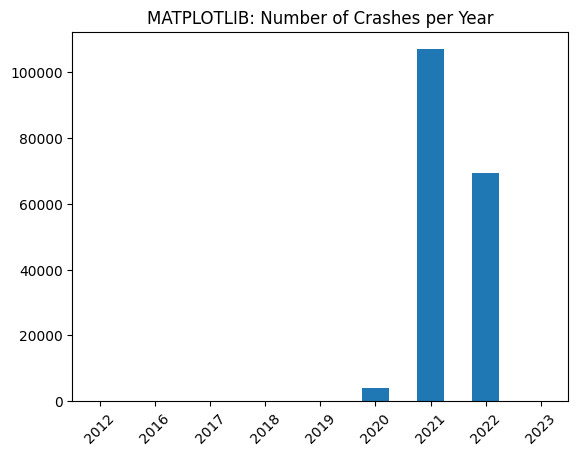

<Axes: title={'center': 'SEABORN: Number of Crashes per Year'}, xlabel='Year', ylabel='count'>

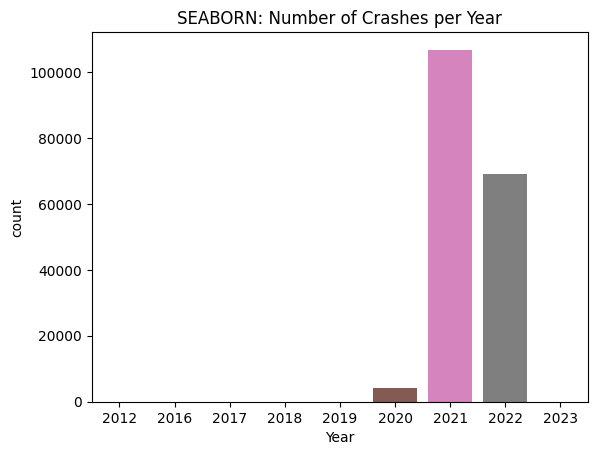

In [214]:
#bar plot for year with matplot lib
year_bar_plot = data['Year'].value_counts().sort_index().plot(kind = 'bar')
#set the title of the bar plot
year_bar_plot.set_title('MATPLOTLIB: Number of Crashes per Year')
year_bar_plot.set_xticklabels(year_bar_plot.get_xticklabels(), rotation=45)

#show the plot
plt.show()

#Now I will create the same bar plot but using Seaborn
#Seaborn has a built in countplot function that does the counting and plot the data
year_bar_plot = sns.countplot(x="Year",data=data)
year_bar_plot.set_title('SEABORN: Number of Crashes per Year')

#show the bar/count plot
year_bar_plot


### Findings
From the above graphs it was evident that a large no of crashes happened during 2021.

### EDA - No of crashes by Month

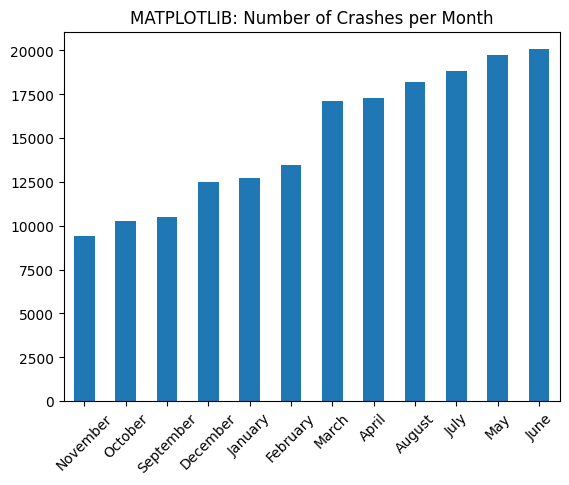

<Axes: title={'center': 'SEABORN: Number of Crashes per Month'}, xlabel='Month', ylabel='count'>

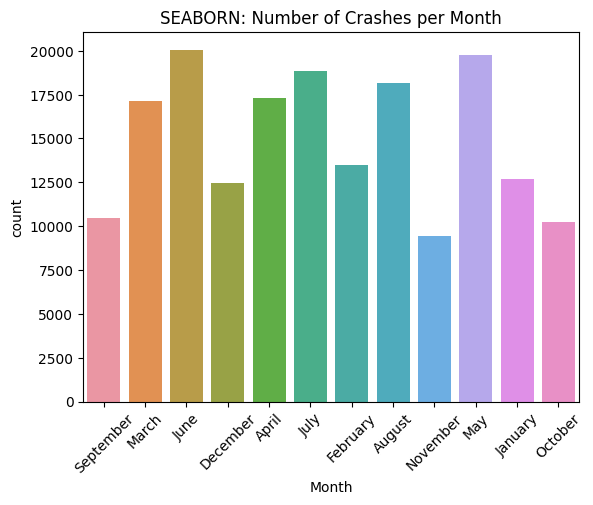

In [215]:
#bar plot for Month with matplot lib
month_bar_plot = data['Month'].value_counts().sort_values().plot(kind = 'bar')
#set the title of the bar plot
month_bar_plot.set_title('MATPLOTLIB: Number of Crashes per Month')
month_bar_plot.set_xticklabels(month_bar_plot.get_xticklabels(), rotation=45)
#show the plot
plt.show()

#Now I will create the same bar plot but using Seaborn
#Seaborn has a built in countplot function that does the counting and plot the data
month_bar_plot=sns.countplot(x='Month', data=data)
month_bar_plot.set_title('SEABORN: Number of Crashes per Month')
month_bar_plot.set_xticklabels(month_bar_plot.get_xticklabels(), rotation=45)

#show the bar/count plot
month_bar_plot


#### Findings:
As per the above plots it was evident that June marks the highest and then follwed by May . To be specific Quater 4 has the least no of crashes.The reason behind this may be that as it was a winter season people are less tend to travel leading to less no of crashes.

### EDA - Crashes by Day

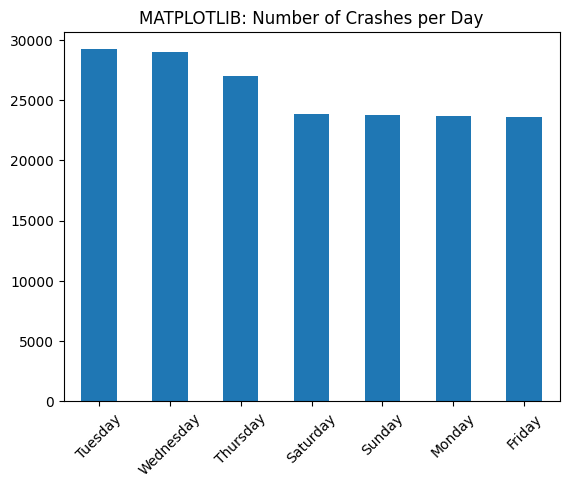

<Axes: title={'center': 'SEABORN: Number of Crashes per Day'}, xlabel='Day', ylabel='count'>

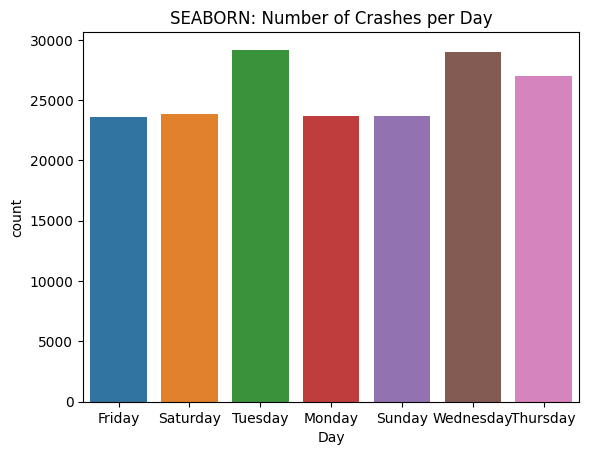

In [216]:
#bar plot for day with matplot lib
day_bar_plot = data['Day'].value_counts().plot(kind = 'bar')
#set the title of the bar plot
day_bar_plot.set_title('MATPLOTLIB: Number of Crashes per Day')
day_bar_plot.set_xticklabels(day_bar_plot.get_xticklabels(), rotation=45)

#show the plot
plt.show()

#Now I will create the same bar plot but using Seaborn
#Seaborn has a built in countplot function that does the counting and plot the data
day_bar_plot = sns.countplot(x="Day",data=data)
day_bar_plot.set_title('SEABORN: Number of Crashes per Day')
#show the bar/count plot
day_bar_plot

#### Findings:
From the above plots It is evident that Tuesday marks the highest crashes day followed by wednesday and Thursday with slight difference.

### EDA - Crashes by Borough

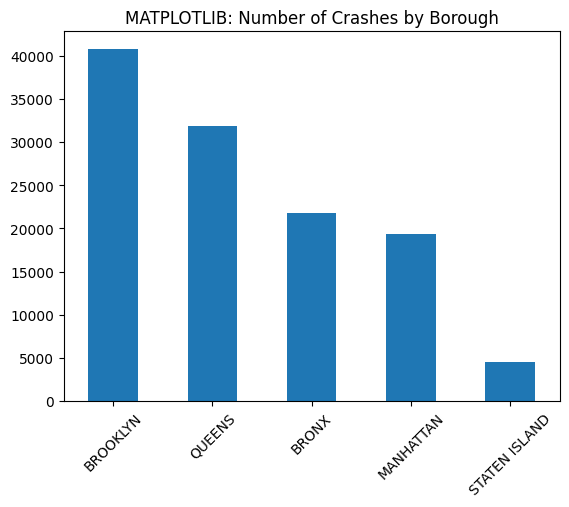

<Axes: title={'center': 'SEABORN: Number of Crashes by Borough'}, xlabel='count', ylabel='borough'>

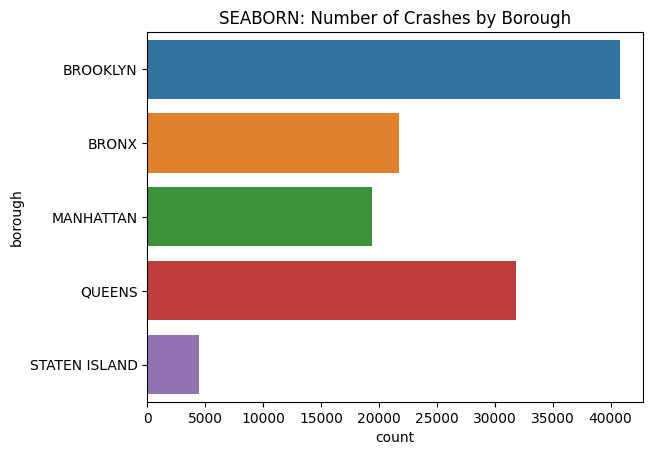

In [217]:
#Matplotlib bar plot for the Number of Crashes by Borough
#plt.gcf().set_size_inches(8, 5)
borough = data['borough'].value_counts().plot(kind = 'bar')
borough.set_title('MATPLOTLIB: Number of Crashes by Borough')
borough.set_xticklabels(borough.get_xticklabels(), rotation=45)

plt.show()

#plt.gcf().set_size_inches(10, 15)
#Seaboarn bar plot for the Number of Crashes by Borough
borough = sns.countplot(y="borough",data=data)
borough.set_title('SEABORN: Number of Crashes by Borough')
borough

### Findings

Based on the data shown above, it is obvious that Brooklyn stood at first place for happening most crashes followed by Queens and STATEN ISLAND beinhg the least and indicating the safe place in terms of travelling.

### EDA - Crashes by  Street


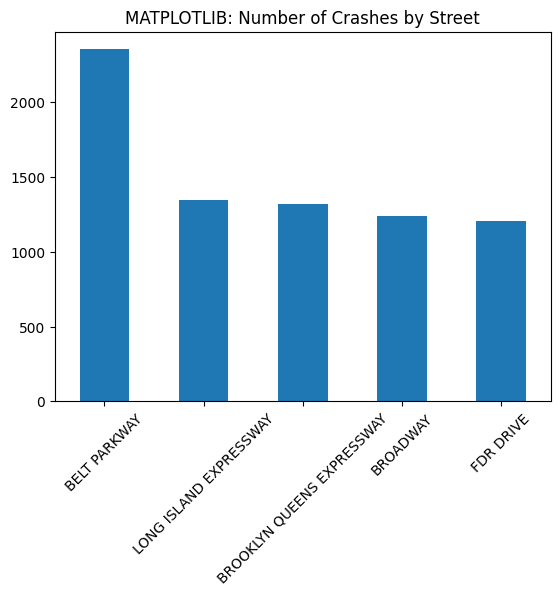

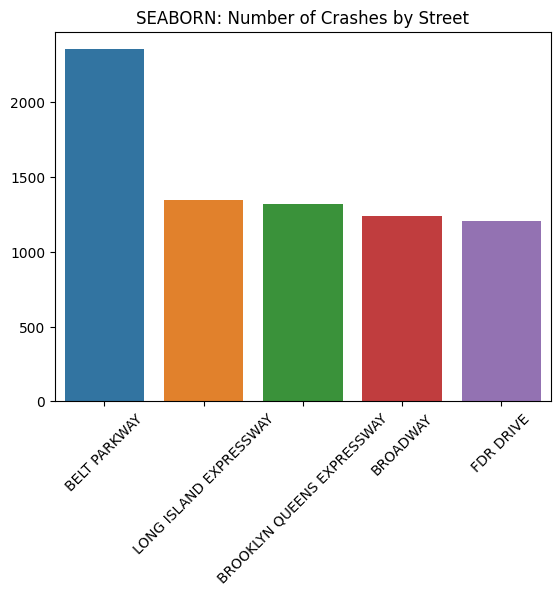

In [218]:
#Matplotlib bar plot for the Number of Crashes by Street

street = data['on_street_name'].value_counts().head().plot(kind = 'bar')
street.set_title('MATPLOTLIB: Number of Crashes by Street')
street.set_xticklabels(street.get_xticklabels(), rotation=45)

plt.show()




#Seaboarn bar plot for the Number of Crashes by Street
streets = data["on_street_name"].value_counts().head(5)
streeti = sns.barplot(x=streets.index, y=streets.values)
streeti.set_title('SEABORN: Number of Crashes by Street')
streeti.set_xticklabels(streeti.get_xticklabels(), rotation=45)
plt.show()

#### Findings:
As there were very large number of street Here I displayed only top 5 streets of having large number of crashes.Belt parkway experience the most no of vehicle crashes follwed by long island express highway.

### EDA - No of Injuries by Month and Day

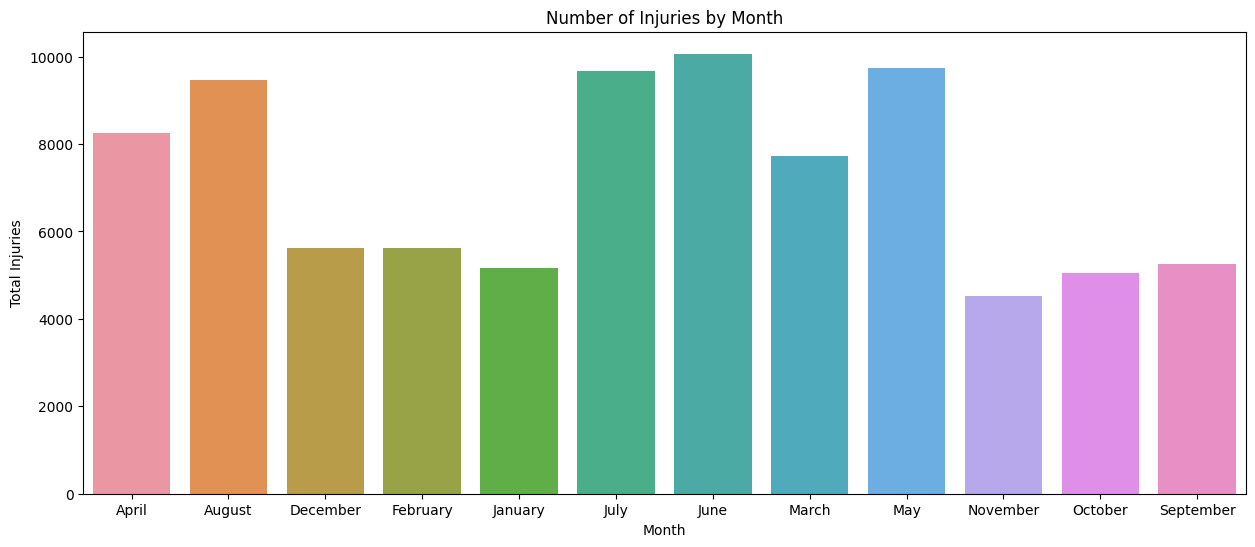

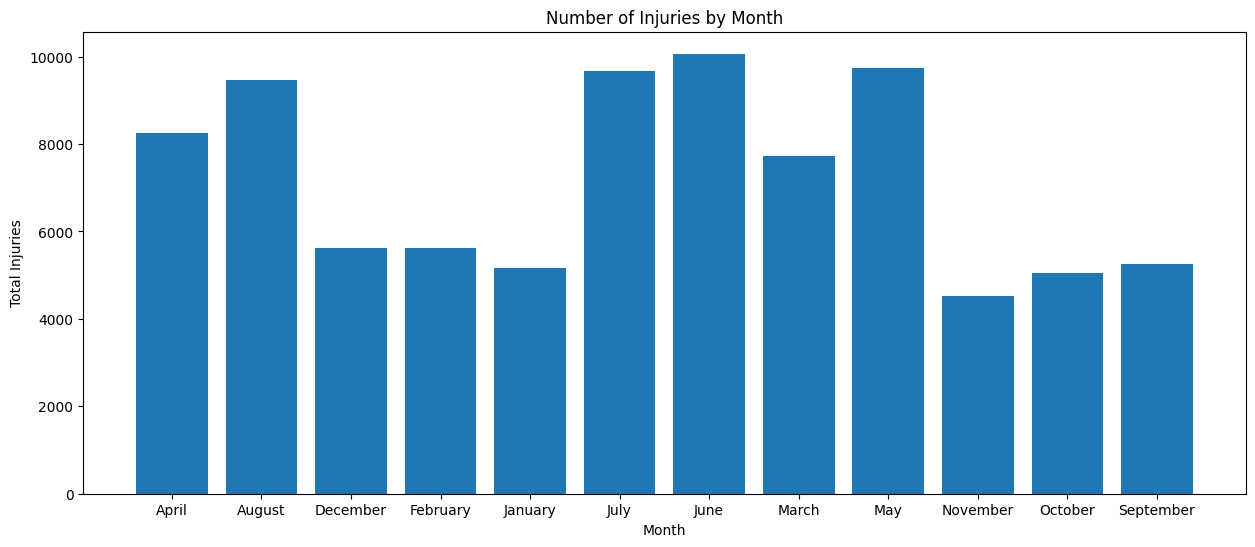

In [219]:
#converting the string to integer data type for the column number of persons injured
data["number_of_persons_injured"]=data["number_of_persons_injured"].astype(int)
monthly_injuries = data.groupby("Month")["number_of_persons_injured"].sum().reset_index()

# Create the bar plot using seaborn
plt.figure(figsize=(15, 6))
sns.barplot(x="Month", y="number_of_persons_injured", data=monthly_injuries)
plt.title("Number of Injuries by Month")
plt.xlabel("Month")
plt.ylabel("Total Injuries")
plt.show()

#using matplotlib
plt.figure(figsize=(15, 6))  # Set the figure size
plt.bar(monthly_injuries["Month"], monthly_injuries["number_of_persons_injured"])
plt.title("Number of Injuries by Month")
plt.xlabel("Month")
plt.ylabel("Total Injuries")
plt.show()


June and July months experience the most number of people got injured

### EDA - Deaths by Day

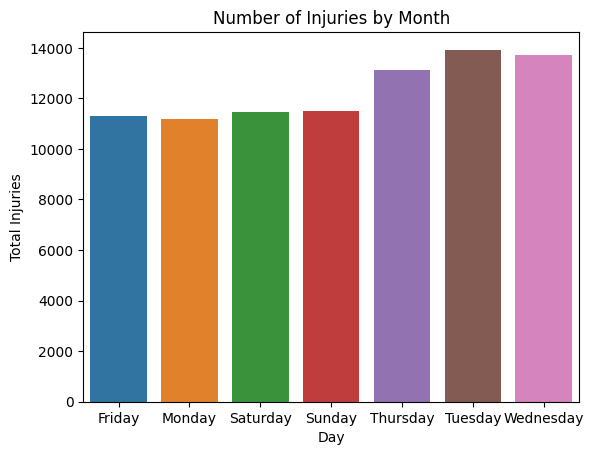

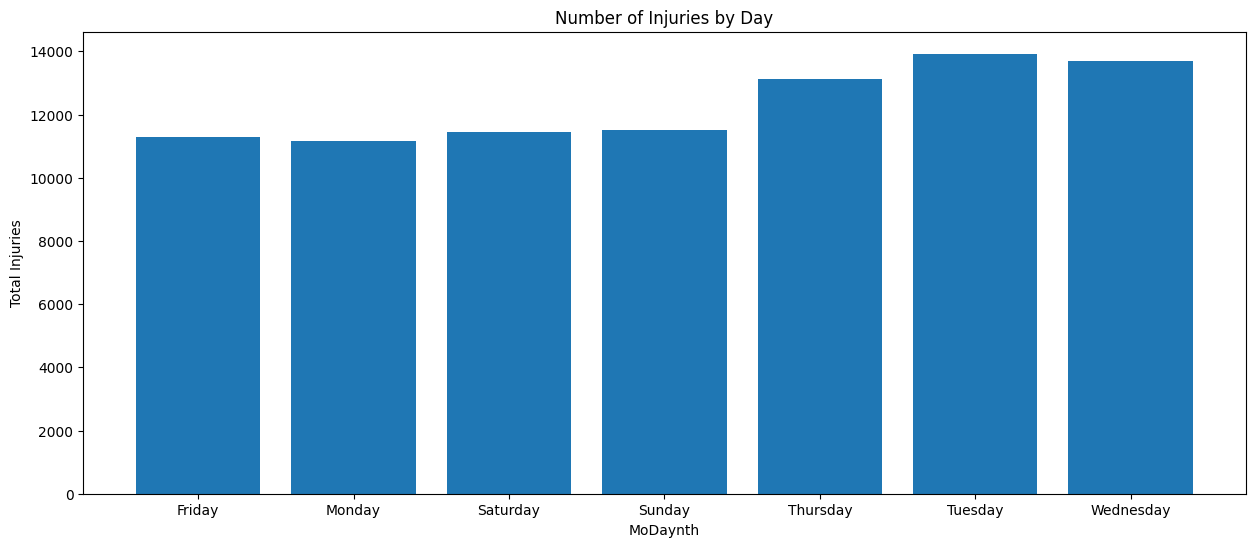

In [220]:
day_injuries = data.groupby("Day")["number_of_persons_injured"].sum().reset_index()

# Create the bar plot using seaborn
sns.barplot(x="Day", y="number_of_persons_injured", data=day_injuries)
plt.title("Number of Injuries by Month")
plt.xlabel("Day")
plt.ylabel("Total Injuries")
plt.show()

#using matplotlib
plt.figure(figsize=(15, 6))  # Set the figure size
plt.bar(day_injuries["Day"], day_injuries["number_of_persons_injured"])
plt.title("Number of Injuries by Day")
plt.xlabel("MoDaynth")
plt.ylabel("Total Injuries")
plt.show()

### Findings

From the above plots Tuesday and Wednesday has the highest no of injuries in a week but all are having slight difference.

### EDA - Deaths by Month and Day


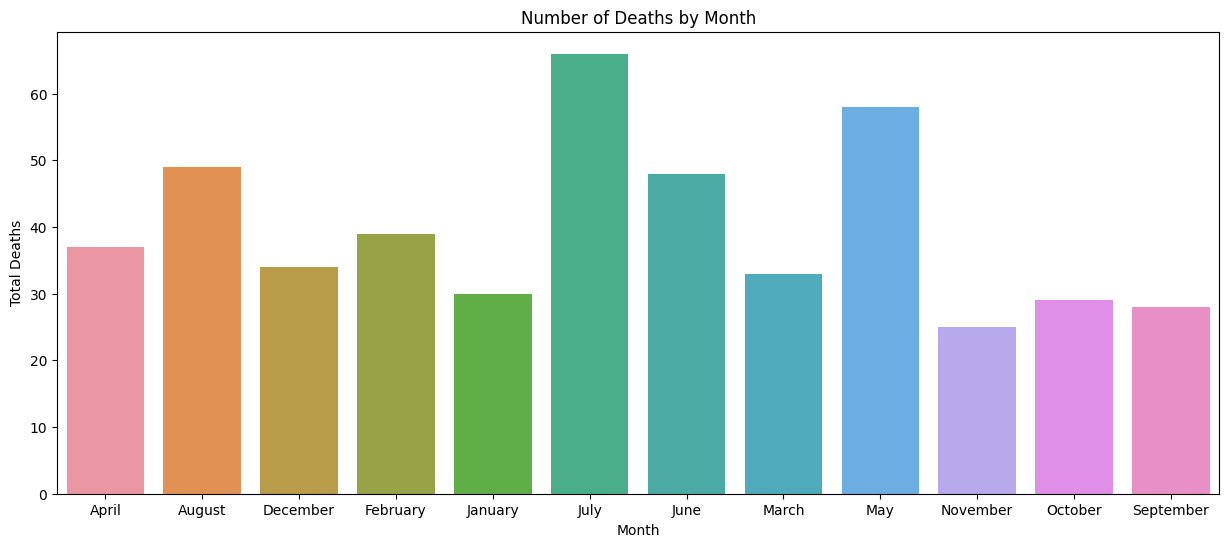

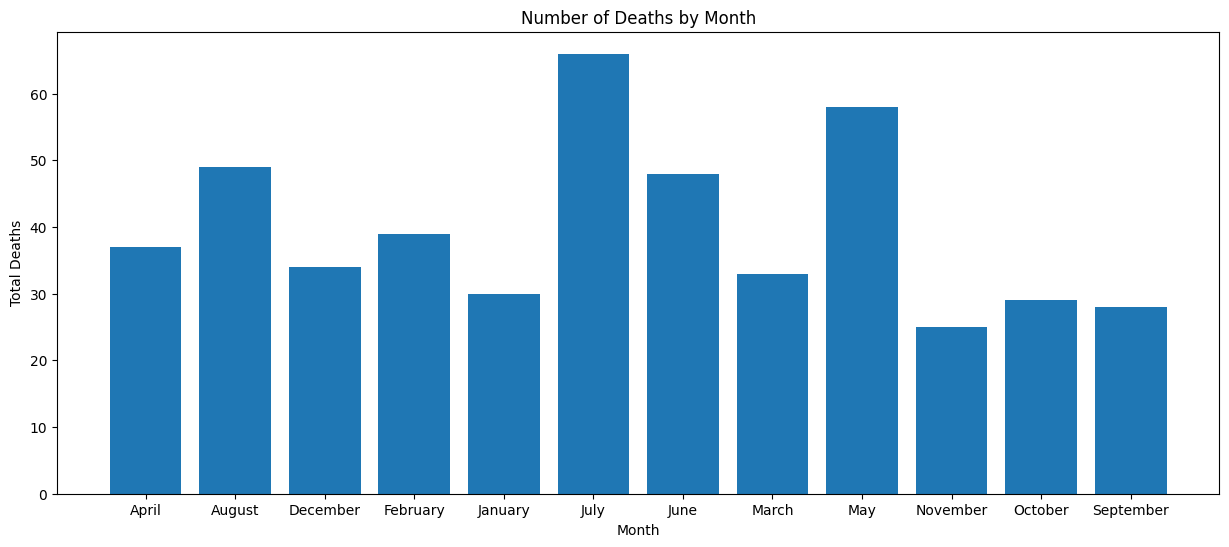

In [221]:
data['number_of_persons_killed']=data['number_of_persons_killed'].astype(int)
monthly_deaths = data.groupby("Month")["number_of_persons_killed"].sum().reset_index()

# Create the bar plot using seaborn
plt.figure(figsize=(15, 6))
sns.barplot(x="Month", y="number_of_persons_killed", data=monthly_deaths)
plt.title("Number of Deaths by Month")
plt.xlabel("Month")
plt.ylabel("Total Deaths")
plt.show()

#using matplotlib
plt.figure(figsize=(15, 6))  # Set the figure size
plt.bar(monthly_deaths["Month"], monthly_deaths["number_of_persons_killed"])
plt.title("Number of Deaths by Month")
plt.xlabel("Month")
plt.ylabel("Total Deaths")
plt.show()


As earlier July has most no of deaths and the months of last quarter i.e.,October, November and December and september also stood at least no of deaths.

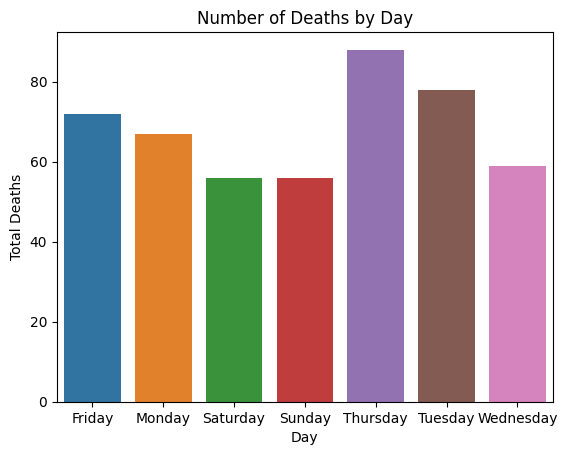

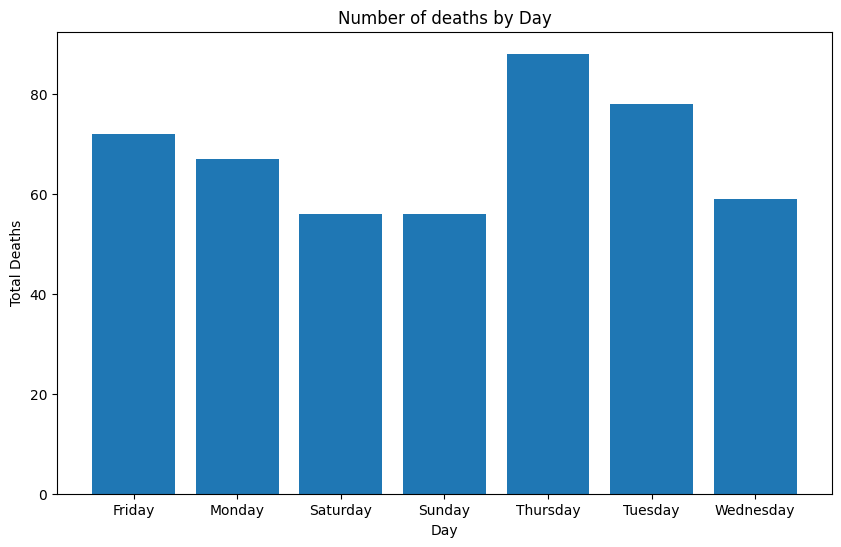

In [222]:
day_deaths = data.groupby("Day")["number_of_persons_killed"].sum().reset_index()

# Create the bar plot using seaborn
sns.barplot(x="Day", y="number_of_persons_killed", data=day_deaths)
plt.title("Number of Deaths by Day")
plt.xlabel("Day")
plt.ylabel("Total Deaths")
plt.show()

#using matplotlib
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(day_deaths["Day"], day_deaths["number_of_persons_killed"])
plt.title("Number of deaths by Day")
plt.xlabel("Day")
plt.ylabel("Total Deaths")
plt.show()

From the above plots, it is evedent that weekdays Thursday has highest number of deaths followed by the Tuesday.

### EDA - Cause of the Crash

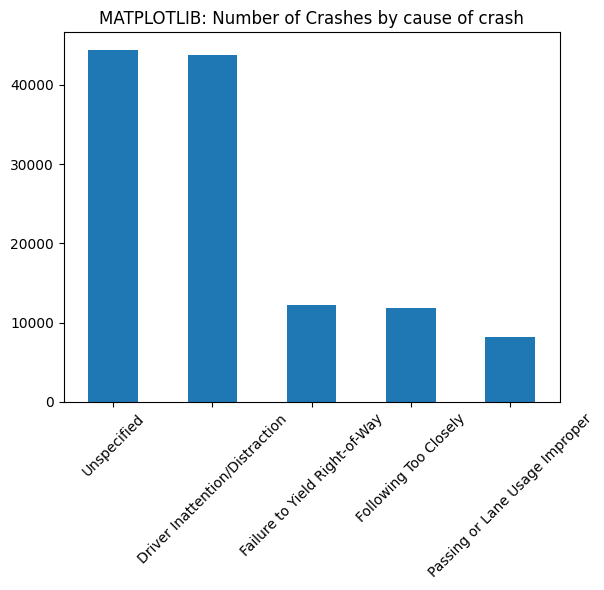

<Axes: title={'center': 'SEABORN: Number of Crashes by cause of crash'}>

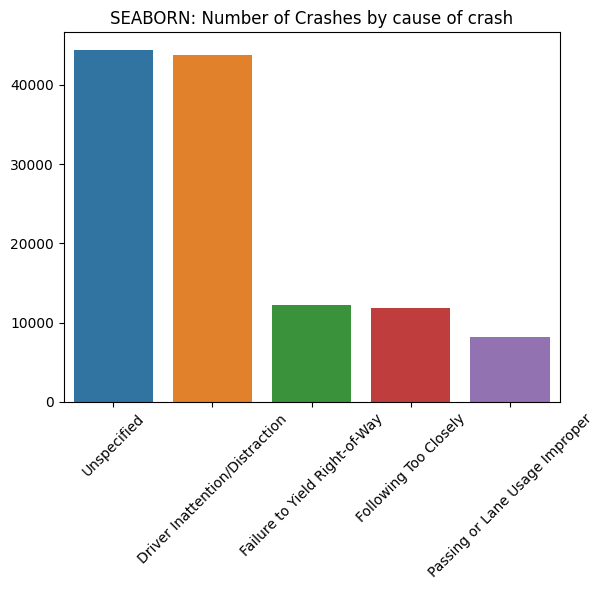

In [223]:
#Matplotlib bar plot for the Number of Crashes by Cause of crash
cause = data['contributing_factor_vehicle_1'].value_counts().head().plot(kind = 'bar')
cause.set_title('MATPLOTLIB: Number of Crashes by cause of crash')
cause.set_xticklabels(cause.get_xticklabels(), rotation=45)

plt.show()

#Seaboarn bar plot for the Number of Crashes by Borough
cause = data['contributing_factor_vehicle_1'].value_counts().head()
cause = sns.barplot(x=cause.index,y=cause.values)
cause.set_title('SEABORN: Number of Crashes by cause of crash')
cause.set_xticklabels(cause.get_xticklabels(), rotation=45)

cause

#### Findings

As there are large number of causes and unable to read from a messy visual I have shown top 5 causes in the plot.Driver Inattention/ Distraction is the main reason for the crashes if we set aside the unspecified reason.

### EDA - Crashes by Time of the day

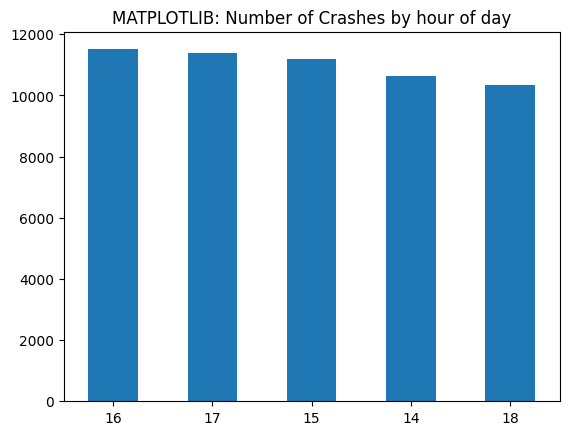

<Axes: title={'center': 'SEABORN: Number of Crashes by hpour of day'}>

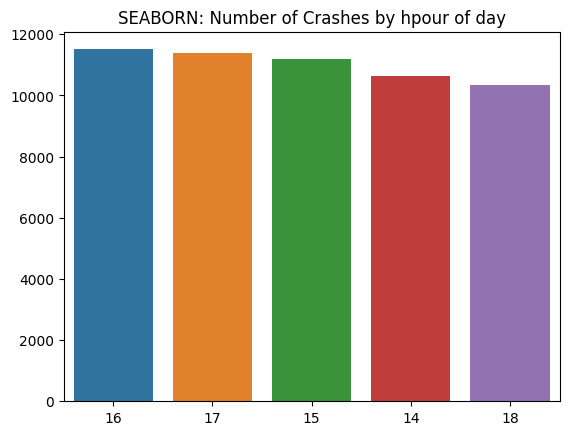

In [224]:
# as we have crash time first we convert into a integer so that it will get round of to the hour
data["crash_time"]=data["crash_time"].str.split(":",expand=True)[0]

#Matplotlib bar plot for the Number of Crashes by hour of day
hour = data['crash_time'].value_counts().head().plot(kind = 'bar')
hour.set_title('MATPLOTLIB: Number of Crashes by hour of day')
hour.set_xticklabels(hour.get_xticklabels(), rotation=0)


plt.show()

#Seaboarn bar plot for the Number of Crashes by hour of the day
hour = data['crash_time'].value_counts().head()
hour = sns.barplot(x=hour.index,y=hour.values)
hour.set_title('SEABORN: Number of Crashes by hpour of day')
hour

#### Findings:
From the above plot it is very interesting to observe that all the crashes has happened from 2pm to 6pm .

##EDA -Deaths by Borough

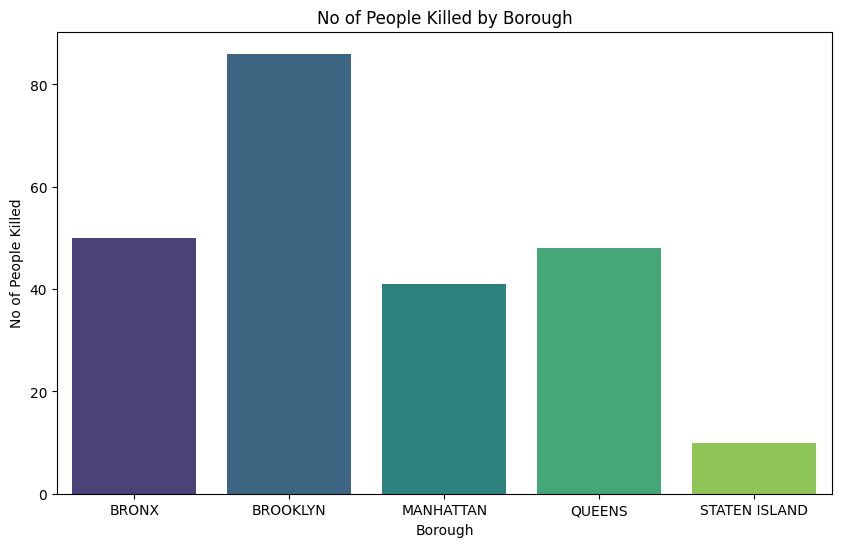

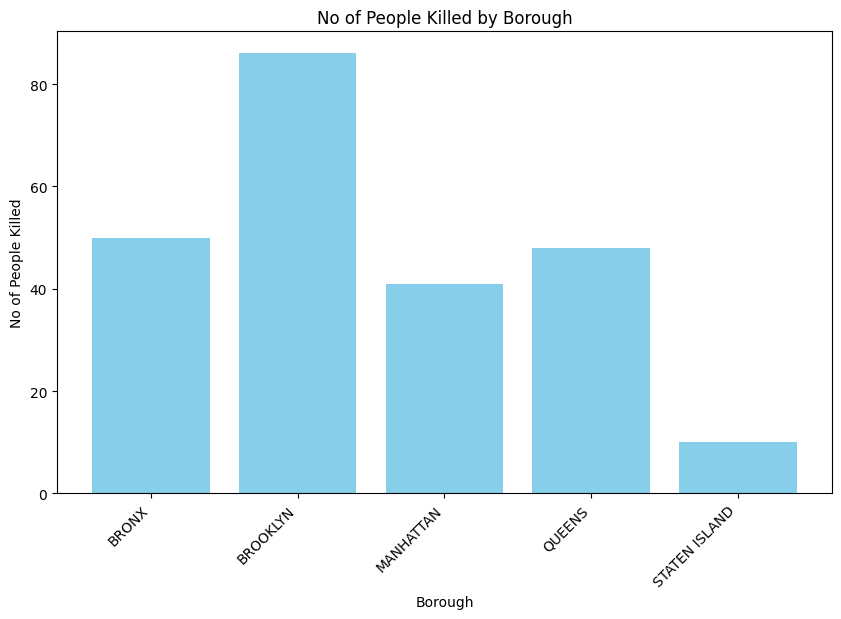

In [225]:

# Calculate the total sum of people killed in each borough
borough_totals = data.groupby('borough')['number_of_persons_killed'].sum().reset_index()

# Create a bar plot with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='borough', y='number_of_persons_killed', data=borough_totals, palette='viridis')
plt.title('No of People Killed by Borough')
plt.xlabel('Borough')
plt.ylabel('No of People Killed')
plt.show()

# Create a bar plot with Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(borough_totals['borough'], borough_totals['number_of_persons_killed'], color='skyblue')
plt.title('No of People Killed by Borough')
plt.xlabel('Borough')
plt.ylabel('No of People Killed')
plt.xticks(rotation=45, ha='right')
plt.show()

Brooklyn has more number of deaths followed by the Bronx.Staten Island is the borough with the least number of deaths.

### EDA - Deaths by Cause

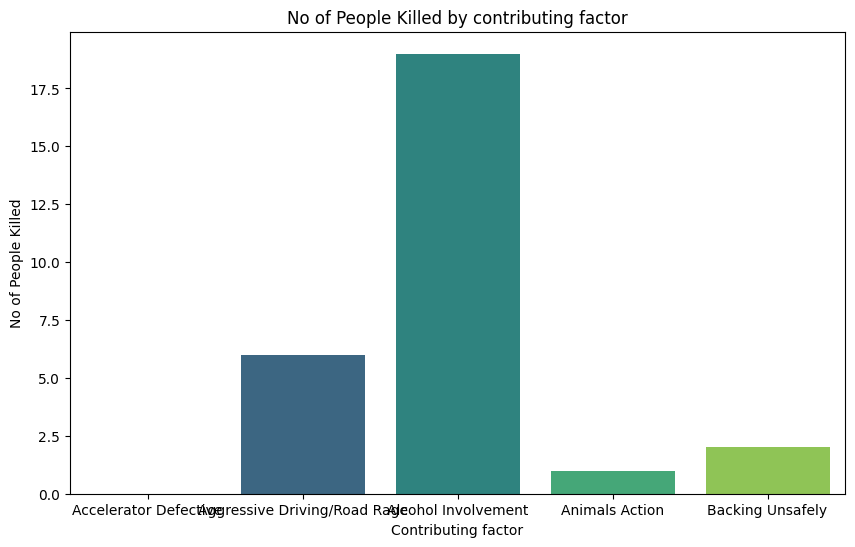

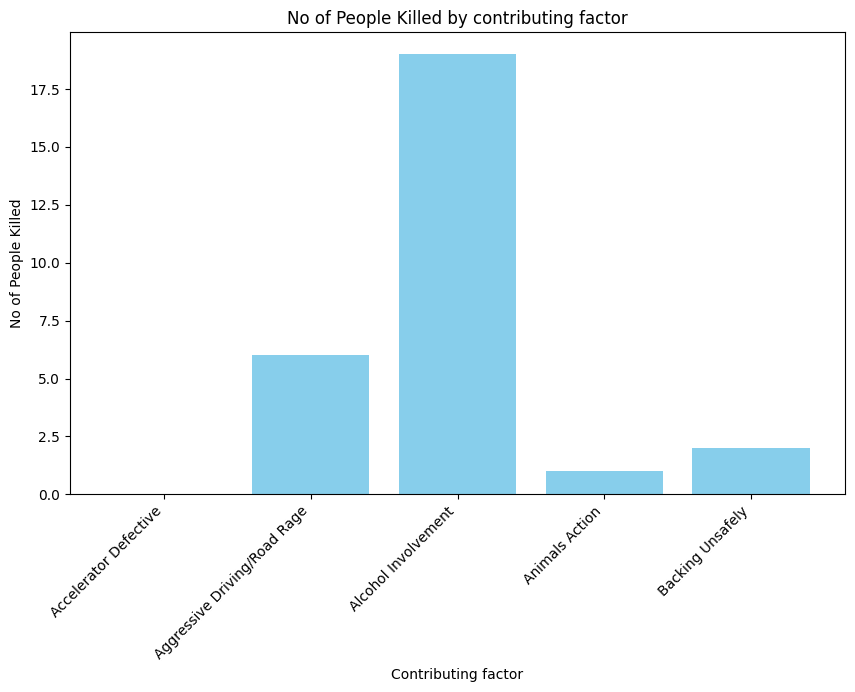

In [226]:


# Calculate the total sum of people killed in each borough
borough_totals = data.groupby('contributing_factor_vehicle_1')['number_of_persons_killed'].sum().reset_index().head()

# Create a bar plot with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='contributing_factor_vehicle_1', y='number_of_persons_killed', data=borough_totals, palette='viridis')
plt.title('No of People Killed by contributing factor')
plt.xlabel('Contributing factor')
plt.ylabel('No of People Killed')
plt.show()

# Create a bar plot with Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(borough_totals['contributing_factor_vehicle_1'], borough_totals['number_of_persons_killed'], color='skyblue')
plt.title('No of People Killed by contributing factor')
plt.xlabel('Contributing factor')
plt.ylabel('No of People Killed')
plt.xticks(rotation=45, ha='right')
plt.show()

More number of people were killed because of the Alcohol involvement followed by the Aggressive driving.

### Injuries v/s Deaths

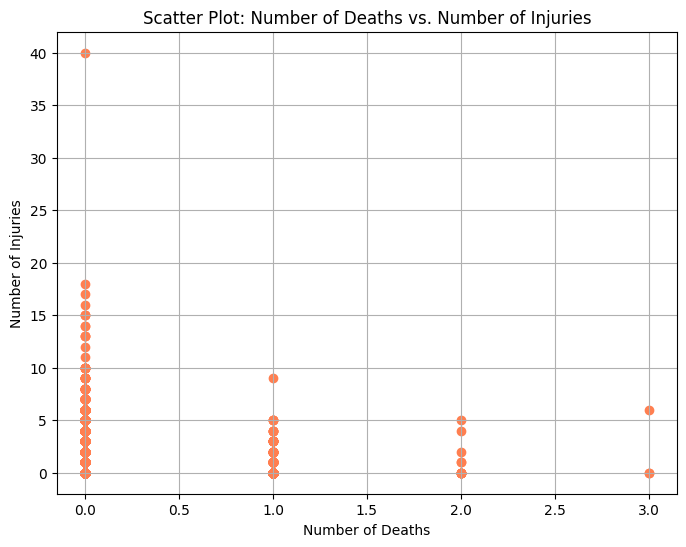

In [227]:
# Create a scatter plot with Matplotlib
plt.figure(figsize=(8, 6))
plt.scatter(data['number_of_persons_killed'].astype(int), data['number_of_persons_injured'].astype(int), color='coral')
plt.title('Scatter Plot: Number of Deaths vs. Number of Injuries')
plt.xlabel('Number of Deaths')
plt.ylabel('Number of Injuries')
plt.grid(True)
plt.show()

In [228]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180030 entries, 0 to 180029
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   crash_date                     180030 non-null  datetime64[ns]
 1   crash_time                     180030 non-null  object        
 2   on_street_name                 131004 non-null  object        
 3   number_of_persons_injured      180030 non-null  int64         
 4   number_of_persons_killed       180030 non-null  int64         
 5   number_of_pedestrians_injured  180030 non-null  object        
 6   number_of_pedestrians_killed   180030 non-null  object        
 7   number_of_cyclist_injured      180030 non-null  object        
 8   number_of_cyclist_killed       180030 non-null  object        
 9   number_of_motorist_injured     180030 non-null  object        
 10  number_of_motorist_killed      180030 non-null  object        
 11  

In [229]:
data.isna().sum()

crash_date                           0
crash_time                           0
on_street_name                   49026
number_of_persons_injured            0
number_of_persons_killed             0
number_of_pedestrians_injured        0
number_of_pedestrians_killed         0
number_of_cyclist_injured            0
number_of_cyclist_killed             0
number_of_motorist_injured           0
number_of_motorist_killed            0
contributing_factor_vehicle_1      918
collision_id                         0
vehicle_type_code1                2176
borough                          61856
Day                                  0
Month                                0
Year                                 0
dtype: int64

In [230]:
data.drop(columns=["vehicle_type_code1", "contributing_factor_vehicle_1", "on_street_name", "collision_id"], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180030 entries, 0 to 180029
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   crash_date                     180030 non-null  datetime64[ns]
 1   crash_time                     180030 non-null  object        
 2   number_of_persons_injured      180030 non-null  int64         
 3   number_of_persons_killed       180030 non-null  int64         
 4   number_of_pedestrians_injured  180030 non-null  object        
 5   number_of_pedestrians_killed   180030 non-null  object        
 6   number_of_cyclist_injured      180030 non-null  object        
 7   number_of_cyclist_killed       180030 non-null  object        
 8   number_of_motorist_injured     180030 non-null  object        
 9   number_of_motorist_killed      180030 non-null  object        
 10  borough                        118174 non-null  object        
 11  

In [231]:
data.isna().sum()

crash_date                           0
crash_time                           0
number_of_persons_injured            0
number_of_persons_killed             0
number_of_pedestrians_injured        0
number_of_pedestrians_killed         0
number_of_cyclist_injured            0
number_of_cyclist_killed             0
number_of_motorist_injured           0
number_of_motorist_killed            0
borough                          61856
Day                                  0
Month                                0
Year                                 0
dtype: int64

In [232]:
data["borough"].value_counts()

BROOKLYN         40776
QUEENS           31806
BRONX            21723
MANHATTAN        19397
STATEN ISLAND     4472
Name: borough, dtype: int64

In [233]:
data["borough"].fillna("BROOKLYN", inplace=True)
data.isna().sum()

crash_date                       0
crash_time                       0
number_of_persons_injured        0
number_of_persons_killed         0
number_of_pedestrians_injured    0
number_of_pedestrians_killed     0
number_of_cyclist_injured        0
number_of_cyclist_killed         0
number_of_motorist_injured       0
number_of_motorist_killed        0
borough                          0
Day                              0
Month                            0
Year                             0
dtype: int64

In [234]:
data["borough"] = data["borough"].map({
    "BROOKLYN": 0,
    "QUEENS": 1,
    "BRONX": 2,
    "MANHATTAN": 3,
    "STATEN ISLAND": 4
})

In [235]:
data["Year"].value_counts()

2021    106740
2022     69204
2020      4039
2017        15
2023        14
2019         5
2018         5
2016         4
2012         4
Name: Year, dtype: int64

In [236]:
data["Day"] = data["Day"].map({
    "Sunday": 0,
    "Monday": 1,
    "Tuesday": 2,
    "Wednesday": 3,
    "Thursday": 4,
    "Friday": 5,
    "Saturday": 6
})
data["Month"] = data["Month"].map({
    "January": 0,
    "February": 1,
    "March": 2,
    "April": 3,
    "May": 4,
    "June": 5,
    "July": 6,
    "August": 7,
    "September": 8,
    "October": 9,
    "November": 10,
    "December": 11
})

In [237]:
for col in data.columns:
  if col == "crash_time" or col == "crash_date":
    continue
  data[col] = data[col].astype(int)

In [238]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180030 entries, 0 to 180029
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   crash_date                     180030 non-null  datetime64[ns]
 1   crash_time                     180030 non-null  object        
 2   number_of_persons_injured      180030 non-null  int64         
 3   number_of_persons_killed       180030 non-null  int64         
 4   number_of_pedestrians_injured  180030 non-null  int64         
 5   number_of_pedestrians_killed   180030 non-null  int64         
 6   number_of_cyclist_injured      180030 non-null  int64         
 7   number_of_cyclist_killed       180030 non-null  int64         
 8   number_of_motorist_injured     180030 non-null  int64         
 9   number_of_motorist_killed      180030 non-null  int64         
 10  borough                        180030 non-null  int64         
 11  

Converted categorical data into numerical data by mapping them with values required. As the data is ordinal, hence being the ranked data, mapped the data with the ordered

## <font color="red">4.Inference
</font>

Now that we've completed the Exploratory Data Analysis we'll perform the analysis required to answer the research question. For any visualizations necessary, I will create the graphic using both Matplotlib and Seaborn.




1. **What are the temporal trends in motor vehicle crashes over time? Are there specific times of the day, days of the week, or months with higher accident rates?**

Ans : From the EDA I can conclude that, More number of crashes has occured in the months of May, June and July. To be specific all the months in first 3 quaters have more no of crashes with less varying in number, but the months of last quarter that is October, November and December having a very less number of crashes. So we can observe a strong seasonality across the months of a year. In the similar way we can see very little seasonilty across the days of the week, Tuesday and wednesday has he highest number of  crashes, even they vary with very lesser number of crashes.And we have more crashes  from 2pm to 6pm

---


In [239]:
#crashes by month
data['Month'].value_counts()

5     20071
4     19743
6     18822
7     18179
3     17295
2     17111
1     13465
0     12703
11    12477
8     10480
9     10252
10     9432
Name: Month, dtype: int64

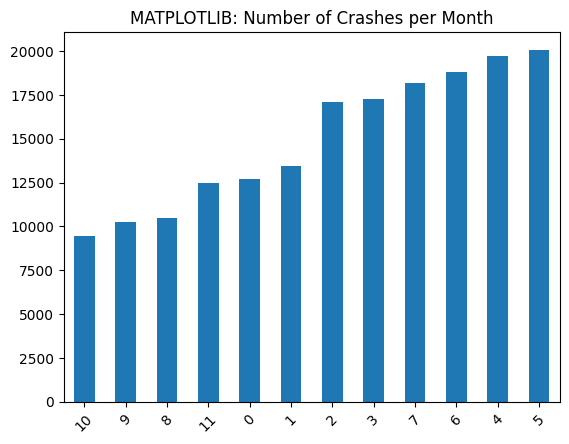

<Axes: title={'center': 'SEABORN: Number of Crashes per Month'}, xlabel='Month', ylabel='count'>

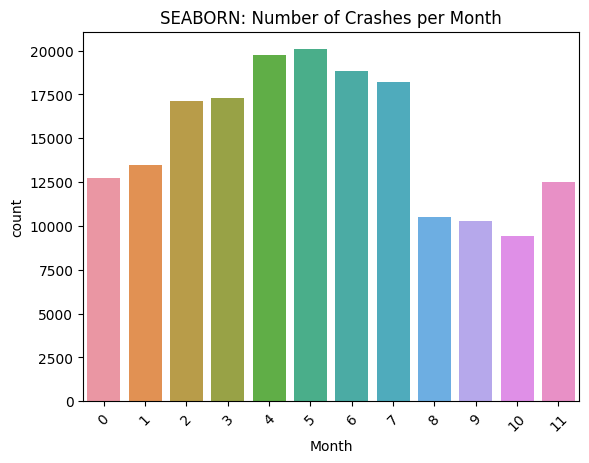

In [240]:
#bar plot for Month with matplot lib
month_bar_plot = data['Month'].value_counts().sort_values().plot(kind = 'bar')
#set the title of the bar plot
month_bar_plot.set_title('MATPLOTLIB: Number of Crashes per Month')
month_bar_plot.set_xticklabels(month_bar_plot.get_xticklabels(), rotation=45)
#show the plot
plt.show()

#Now I will create the same bar plot but using Seaborn
#Seaborn has a built in countplot function that does the counting and plot the data
month_bar_plot=sns.countplot(x='Month', data=data)
month_bar_plot.set_title('SEABORN: Number of Crashes per Month')
month_bar_plot.set_xticklabels(month_bar_plot.get_xticklabels(), rotation=45)

#show the bar/count plot
month_bar_plot


In [241]:
#crashes by day
data['Day'].value_counts()

2    29182
3    29009
4    27017
6    23841
0    23719
1    23697
5    23565
Name: Day, dtype: int64

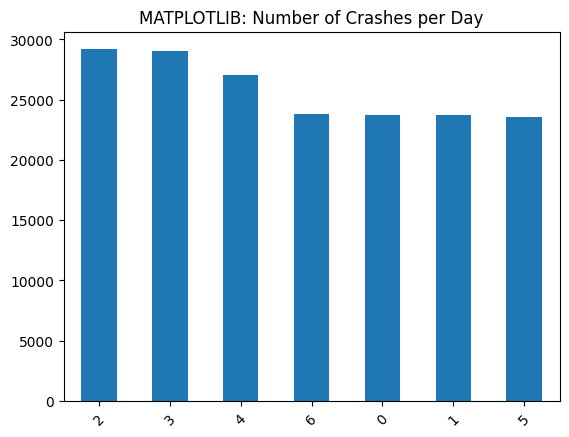

<Axes: title={'center': 'SEABORN: Number of Crashes per Day'}, xlabel='Day', ylabel='count'>

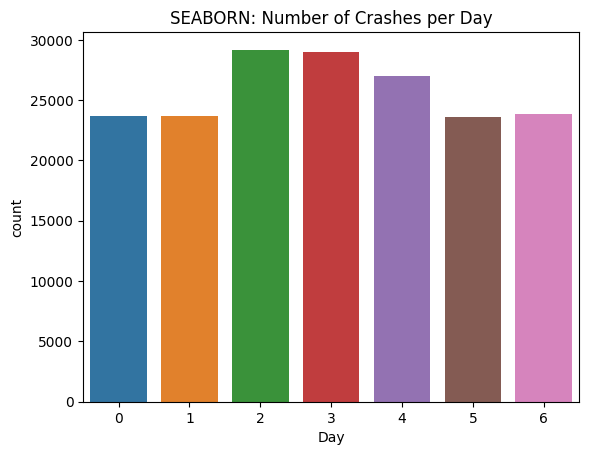

In [242]:
#bar plot for day with matplot lib
day_bar_plot = data['Day'].value_counts().plot(kind = 'bar')
#set the title of the bar plot
day_bar_plot.set_title('MATPLOTLIB: Number of Crashes per Day')
day_bar_plot.set_xticklabels(day_bar_plot.get_xticklabels(), rotation=45)

#show the plot
plt.show()

#Now I will create the same bar plot but using Seaborn
#Seaborn has a built in countplot function that does the counting and plot the data
day_bar_plot = sns.countplot(x="Day",data=data)
day_bar_plot.set_title('SEABORN: Number of Crashes per Day')
#show the bar/count plot
day_bar_plot


2. **Is there a correlation between the time of day and the severity of crashes (i.e., more fatalities during certain hours)?**

Ans : Interesting there is a strong relation between the time of the day and the crashes. From EDA I found that mostly crashes has been happened only from 2pm to 7pm.

---


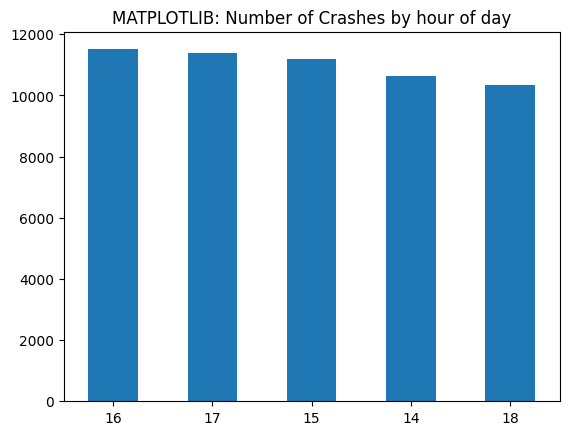

<Axes: title={'center': 'SEABORN: Number of Crashes by hpour of day'}>

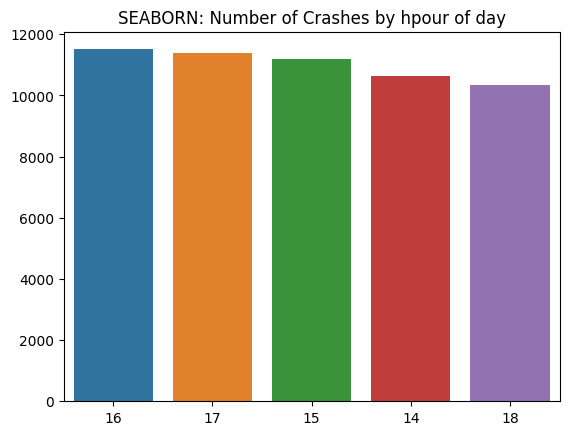

In [243]:
# as we have crash time first we convert into a integer so that it will get round of to the hour
data["crash_time"]=data["crash_time"].str.split(":",expand=True)[0]

#Matplotlib bar plot for the Number of Crashes by hour of day
hour = data['crash_time'].value_counts().head().plot(kind = 'bar')
hour.set_title('MATPLOTLIB: Number of Crashes by hour of day')
hour.set_xticklabels(hour.get_xticklabels(), rotation=0)


plt.show()

#Seaboarn bar plot for the Number of Crashes by hour of the day
hour = data['crash_time'].value_counts().head()
hour = sns.barplot(x=hour.index,y=hour.values)
hour.set_title('SEABORN: Number of Crashes by hpour of day')
hour

3. **Where are the most dangerous locations for motor vehicle crashes? Can we identify high-risk areas?**

Ans : Brroklyn, Queens , Manhattan and Bronx are the dangerous and high risk areas among the boroughs.In streets, Broadway, Atlantic and 3rd Avuenue are risky areas.

---


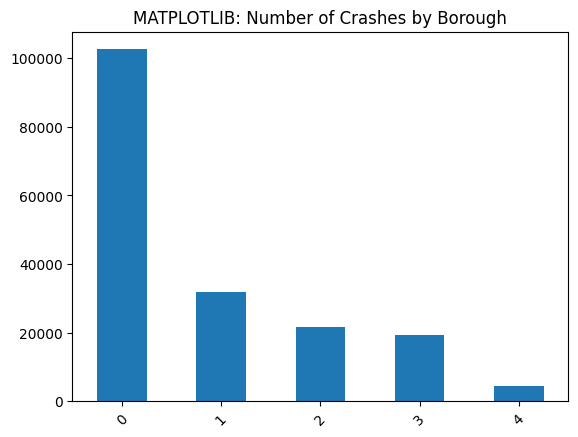

<Axes: title={'center': 'SEABORN: Number of Crashes by Borough'}, xlabel='count', ylabel='borough'>

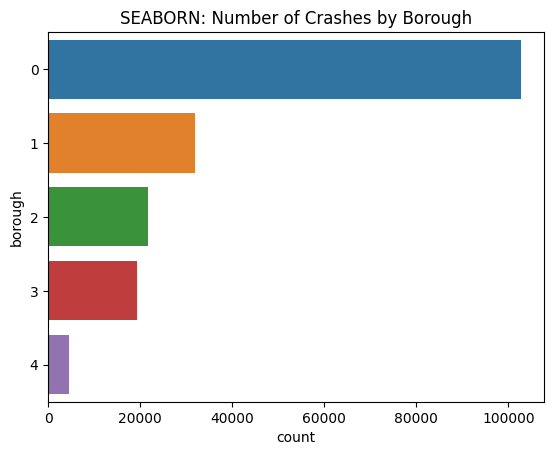

In [244]:
#Matplotlib bar plot for the Number of Crashes by Borough
#plt.gcf().set_size_inches(8, 5)
borough = data['borough'].value_counts().plot(kind = 'bar')
borough.set_title('MATPLOTLIB: Number of Crashes by Borough')
borough.set_xticklabels(borough.get_xticklabels(), rotation=45)

plt.show()

#plt.gcf().set_size_inches(10, 15)
#Seaboarn bar plot for the Number of Crashes by Borough
borough = sns.countplot(y="borough",data=data)
borough.set_title('SEABORN: Number of Crashes by Borough')
borough

4. **Are there seasonal variations in the frequency and severity of motor vehicle crashes?**

Ans:There is a strong seasonality across the particular time of the day which is from 2pm to 7pm and among the months its first 3 quaters has large number of crashes with less varying number of crashes across the months of first 3 quaters.


** 5. Based on the vehicle crash analysis, what are the major number of the crashes, where the humans are killed?. What is the best correlation between the other variables and killed persons count?**

##  <font color="red">Project 4
</font>


#### <font color="red">  Model Building using the pipeline and cross validation</font>

In [245]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180030 entries, 0 to 180029
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   crash_date                     180030 non-null  datetime64[ns]
 1   crash_time                     180030 non-null  object        
 2   number_of_persons_injured      180030 non-null  int64         
 3   number_of_persons_killed       180030 non-null  int64         
 4   number_of_pedestrians_injured  180030 non-null  int64         
 5   number_of_pedestrians_killed   180030 non-null  int64         
 6   number_of_cyclist_injured      180030 non-null  int64         
 7   number_of_cyclist_killed       180030 non-null  int64         
 8   number_of_motorist_injured     180030 non-null  int64         
 9   number_of_motorist_killed      180030 non-null  int64         
 10  borough                        180030 non-null  int64         
 11  

In [246]:
data.drop(columns=["crash_time", "crash_date"], inplace=True)

In [247]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180030 entries, 0 to 180029
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   number_of_persons_injured      180030 non-null  int64
 1   number_of_persons_killed       180030 non-null  int64
 2   number_of_pedestrians_injured  180030 non-null  int64
 3   number_of_pedestrians_killed   180030 non-null  int64
 4   number_of_cyclist_injured      180030 non-null  int64
 5   number_of_cyclist_killed       180030 non-null  int64
 6   number_of_motorist_injured     180030 non-null  int64
 7   number_of_motorist_killed      180030 non-null  int64
 8   borough                        180030 non-null  int64
 9   Day                            180030 non-null  int64
 10  Month                          180030 non-null  int64
 11  Year                           180030 non-null  int64
dtypes: int64(12)
memory usage: 16.5 MB


#### Removing outliers

In [248]:
# def remove_outliers_iqr(data_frame, column_name, lower_bound_factor=1.5, upper_bound_factor=1.5):

#     # Calculate the first and third quartiles (Q1 and Q3)
#     Q1 = data_frame[column_name].quantile(0.25)
#     Q3 = data_frame[column_name].quantile(0.75)

#     # Calculate the Interquartile Range (IQR)
#     IQR = Q3 - Q1

#     # Define the lower and upper bounds for outlier detection
#     lower_bound = Q1 - lower_bound_factor * IQR
#     upper_bound = Q3 + upper_bound_factor * IQR

#     # Filter out rows with values outside the bounds
#     filtered_data = data_frame[(data_frame[column_name] >= lower_bound) & (data_frame[column_name] <= upper_bound)]

#     return filtered_data

# for col in data.columns:
#   data = remove_outliers_iqr(data, col)

By removing the outliers, it is completely removing the other point of data, such as number of persons killed here data are list of 0,1,2,3
But as the 2,3,4 are outliers, it is removing it and giving us the 100% accuracy model with only single class to predict, which is overfitting

#### Scaling

In [249]:
X, y = data.drop(columns=["number_of_persons_killed"]), data["number_of_persons_killed"]

In [250]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [251]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer # The primary purpose of SimpleImputer is to address missing values in your dataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Random Forest is often chosen for classification tasks due to its effectiveness in handling various challenges inherent in machine learning problems. Its ensemble learning approach provides robustness against overfitting, and it can capture complex relationships in data, making it suitable for a wide range of datasets. Additionally, Random Forests offer insights into feature importance, ease of use with default parameters, and the ability to handle missing data.

In [252]:
# Create a pipeline with imputation and RandomForestClassifier
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, criterion="gini", max_depth=10, max_features=10))
])

# Use cross-validation to evaluate the model
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


In [253]:
# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.99982642 0.99982642 0.99965284 0.99989585 0.99993057]
Mean CV Score: 0.9998264185423725


In [254]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()),
                ('classifier',
                 RandomForestClassifier(max_depth=10, max_features=10,
                                        random_state=42))])

In [255]:
# Make predictions on the test set
y_pred = pipeline.predict(X_test)

In [256]:
# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9998889074043215


In [257]:
from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Generate and print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Confusion Matrix:
[[35929     0     0]
 [    3    70     0]
 [    0     1     3]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35929
           1       0.99      0.96      0.97        73
           2       1.00      0.75      0.86         4

    accuracy                           1.00     36006
   macro avg       1.00      0.90      0.94     36006
weighted avg       1.00      1.00      1.00     36006



We can see that, based on our question and model analysis, majority of crashes, where the no persons were killed is higher and followed by 1 person to be killed is validated.

## <font color="red">5.Conclusion
</font>

So from the above EDA and the analysis I found that there is a seasonality in the variation of no of rashes across the months like first 3 quaters of the calendar year with large number of crashes and last quater being with less number of crashes so Traffic or Transport department should be more vigilent in those days and public as well need to take an extra mile interms of safety and also Driver Inattention/ Distraction is the main reason for the crashes so people has to keep this in mind while driving. And Interestingly I found that more crashes has beemn happeneing during the weekdays Tuesday and Thursday and in the timing from 2pm to 7pm this might be due to week day work ending and office closure hours.And also Brokloyn, Queens and manhattan has the highest number of crashes across the streets Broadway, Atlantic and 3rd avenue being the most.

From this findings repsective authority of the governament can take preventive measures to acoid the crashes by deploying more traffic police force at the above mentioned areas at particular times across the all risky and dangerous areas.

## <font color="red">6.References:</font>



   1. https://catalog.data.gov/dataset/motor-vehicle-collisions-crashes
    
   2. https://www.delftstack.com/howto/seaborn/size-of-seaborn-plot/
    
   3. https://seaborn.pydata.org/generated/seaborn.countplot.html
    
   4. https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
    
   5. https://www.geeksforgeeks.org/how-to-add-title-to-subplots-in-matplotlib/?ref=lbp